In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

### The maximum subarray

In [2]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 16, -4, 7]

In [3]:
num_iter = 0
num_func = 0

In [4]:
def maxCrossingSum(arr, l, m, h):
    global num_func
    global num_iter

    num_func += 1
    # Include elements on left of mid.
    sm = 0
    left_sum = -10000
 
    for i in range(m, l-1, -1):
        sm = sm + arr[i]
 
        if (sm > left_sum):
            left_sum = sm
            max_left = i
        num_iter += 1
    # Include elements on right of mid
    sm = 0
    right_sum = -1000
    for i in range(m + 1, h + 1):
        sm = sm + arr[i]
 
        if (sm > right_sum):
            right_sum = sm
            max_right = i

        num_iter += 1
    # Return sum of elements on left and right of mid
    # returning only left_sum + right_sum will fail for [-2, 1]
    print('Current interval: ', max_left, '-', max_right)
    return max(left_sum + right_sum, left_sum, right_sum)
 
 
# Returns sum of maximum sum subarray in aa[l..h]
def maxSubArraySum(arr, l, h):
    global num_func
    global num_iter
    num_func += 1

    # Base Case: Only one element
    if (l == h):
        return arr[l]
 
    # Find middle point
    m = (l + h) // 2
    print('Current interval: ', l, m)

    num_iter += 1
    return max(maxSubArraySum(arr, l, m),
               maxSubArraySum(arr, m+1, h),
               maxCrossingSum(arr, l, m, h))

In [5]:
maxSubArraySum(A, 0, len(A)-1)

Current interval:  0 7
Current interval:  0 3
Current interval:  0 1
Current interval:  0 0
Current interval:  0 - 1
Current interval:  2 2
Current interval:  2 - 3
Current interval:  0 - 3
Current interval:  4 5
Current interval:  4 4
Current interval:  4 - 5
Current interval:  6 6
Current interval:  6 - 7
Current interval:  5 - 7
Current interval:  3 - 4
Current interval:  8 11
Current interval:  8 9
Current interval:  8 8
Current interval:  8 - 9
Current interval:  10 10
Current interval:  10 - 11
Current interval:  8 - 10
Current interval:  12 13
Current interval:  12 12
Current interval:  12 - 13
Current interval:  14 14
Current interval:  14 - 15
Current interval:  13 - 15
Current interval:  8 - 15
Current interval:  7 - 10


43

In [6]:
num_iter, num_func

(79, 46)

Evaluate time

In [7]:
# function without printing
def maxCrossingSum(arr, l, m, h):
    global num_func
    global num_iter

    num_func += 1
    # Include elements on left of mid.
    sm = 0
    left_sum = -10000
 
    for i in range(m, l-1, -1):
        sm = sm + arr[i]
 
        if (sm > left_sum):
            left_sum = sm
            max_left = i
        num_iter += 1
    # Include elements on right of mid
    sm = 0
    right_sum = -1000
    for i in range(m + 1, h + 1):
        sm = sm + arr[i]
 
        if (sm > right_sum):
            right_sum = sm
            max_right = i

        num_iter += 1
    # Return sum of elements on left and right of mid
    # returning only left_sum + right_sum will fail for [-2, 1]
    return max(left_sum + right_sum, left_sum, right_sum)
 
 
# Returns sum of maximum sum subarray in aa[l..h]
def maxSubArraySum(arr, l, h):
    global num_func
    global num_iter
    num_func += 1

    # Base Case: Only one element
    if (l == h):
        return arr[l]
 
    # Find middle point
    m = (l + h) // 2
    num_iter += 1
    return max(maxSubArraySum(arr, l, m),
               maxSubArraySum(arr, m+1, h),
               maxCrossingSum(arr, l, m, h))

In [8]:
times = []
iters = []

In [9]:
for i in range(1, 1000):
    num_iter = 0
    num_func = 0
    A = np.random.randint(-100, 100, i)
    start = time()
    b = maxSubArraySum(A, 0, len(A)-1)
    times.append(time() - start)
    iters.append(num_iter)

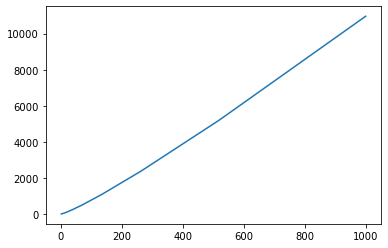

In [10]:
plt.plot(np.arange(1, 1000), iters)

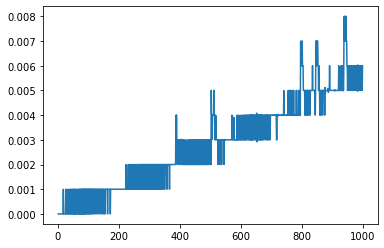

In [11]:
plt.plot(np.arange(1, 1000), times)

### Optimal binary search trees

In [12]:
import sys
from random import randint


class Node:
    """Binary Search Tree Node"""

    def __init__(self, key, freq):
        self.key = key
        self.freq = freq

    def __str__(self):
        """
        >>> str(Node(1, 2))
        'Node(key=1, freq=2)'
        """
        return f"Node(key={self.key}, freq={self.freq})"


def print_binary_search_tree(root, key, i, j, parent, is_left):

    if i > j or i < 0 or j > len(root) - 1:
        return

    node = root[i][j]
    if parent == -1:  # root does not have a parent
        print(f"{key[node]} is the root of the binary search tree.")
    elif is_left:
        print(f"{key[node]} is the left child of key {parent}.")
    else:
        print(f"{key[node]} is the right child of key {parent}.")

    print_binary_search_tree(root, key, i, node - 1, key[node], True)
    print_binary_search_tree(root, key, node + 1, j, key[node], False)


def find_optimal_binary_search_tree(nodes):
    
    # Tree nodes must be sorted first, the code below sorts the keys in 
    # increasing order and rearrange its frequencies accordingly.
    nodes.sort(key=lambda node: node.key)

    n = len(nodes)

    keys = [nodes[i].key for i in range(n)]
    freqs = [nodes[i].freq for i in range(n)]

    # for a single key, cost is equal to frequency of the key.
    dp = [[freqs[i] if i == j else 0 for j in range(n)] for i in range(n)]

    sum = [[freqs[i] if i == j else 0 for j in range(n)] for i in range(n)]
    # stores tree roots that will be used later for constructing binary search tree
    root = [[i if i == j else 0 for j in range(n)] for i in range(n)]

    for interval_length in range(2, n + 1):
        for i in range(n - interval_length + 1):
            j = i + interval_length - 1

            dp[i][j] = sys.maxsize  # set the value to "infinity"
            sum[i][j] = sum[i][j - 1] + freqs[j]

            for r in range(root[i][j - 1], root[i + 1][j] + 1):  # r is a temporal root
                left = dp[i][r - 1] if r != i else 0  # optimal cost for left subtree
                right = dp[r + 1][j] if r != j else 0  # optimal cost for right subtree
                cost = left + sum[i][j] + right

                if dp[i][j] > cost:
                    dp[i][j] = cost
                    root[i][j] = r

    print("Binary search tree nodes:")
    for node in nodes:
        print(node)

    print(f"\nThe cost of optimal BST for given tree nodes is {dp[0][n - 1]}.")
    print_binary_search_tree(root, keys, 0, n - 1, -1, False)



In [13]:
# A sample binary search tree
nodes = [Node(i, randint(1, 50)) for i in range(10, 0, -1)]
find_optimal_binary_search_tree(nodes)


Binary search tree nodes:
Node(key=1, freq=17)
Node(key=2, freq=39)
Node(key=3, freq=33)
Node(key=4, freq=38)
Node(key=5, freq=38)
Node(key=6, freq=25)
Node(key=7, freq=41)
Node(key=8, freq=35)
Node(key=9, freq=34)
Node(key=10, freq=5)

The cost of optimal BST for given tree nodes is 818.
5 is the root of the binary search tree.
3 is the left child of key 5.
2 is the left child of key 3.
1 is the left child of key 2.
4 is the right child of key 3.
8 is the right child of key 5.
7 is the left child of key 8.
6 is the left child of key 7.
9 is the right child of key 8.
10 is the right child of key 9.


Without print

In [14]:
def optimal_BTS(nodes):
    num_iter = 0

    nodes.sort(key=lambda node: node.key)

    n = len(nodes)

    keys = [nodes[i].key for i in range(n)]
    freqs = [nodes[i].freq for i in range(n)]

    dp = [[freqs[i] if i == j else 0 for j in range(n)] for i in range(n)]

    sum = [[freqs[i] if i == j else 0 for j in range(n)] for i in range(n)]

    root = [[i if i == j else 0 for j in range(n)] for i in range(n)]

    for interval_length in range(2, n + 1):
        for i in range(n - interval_length + 1):
            j = i + interval_length - 1

            dp[i][j] = sys.maxsize  # set the value to "infinity"
            sum[i][j] = sum[i][j - 1] + freqs[j]

            for r in range(root[i][j - 1], root[i + 1][j] + 1):  # r is a temporal root
                left = dp[i][r - 1] if r != i else 0  # optimal cost for left subtree
                right = dp[r + 1][j] if r != j else 0  # optimal cost for right subtree
                cost = left + sum[i][j] + right

                if dp[i][j] > cost:
                    dp[i][j] = cost
                    root[i][j] = r
                num_iter += 1
    return num_iter

In [15]:
# A sample binary search tree
nodes = [Node(i, randint(1, 50)) for i in range(10, 0, -1)]
find_optimal_binary_search_tree(nodes)


Binary search tree nodes:
Node(key=1, freq=7)
Node(key=2, freq=21)
Node(key=3, freq=25)
Node(key=4, freq=15)
Node(key=5, freq=38)
Node(key=6, freq=33)
Node(key=7, freq=20)
Node(key=8, freq=2)
Node(key=9, freq=16)
Node(key=10, freq=2)

The cost of optimal BST for given tree nodes is 427.
5 is the root of the binary search tree.
3 is the left child of key 5.
2 is the left child of key 3.
1 is the left child of key 2.
4 is the right child of key 3.
7 is the right child of key 5.
6 is the left child of key 7.
9 is the right child of key 7.
8 is the left child of key 9.
10 is the right child of key 9.


In [16]:
iters = []
times = []

In [17]:
for n in range(1, 500):
    nodes = [Node(i, randint(1, 50)) for i in range(n, 0, -1)]
    start = time()
    iters.append(optimal_BTS(nodes))
    times.append(time() - start)

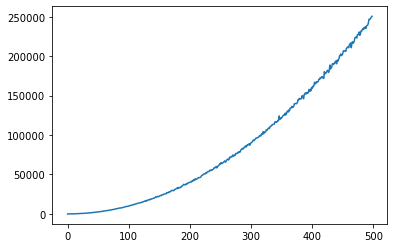

In [18]:
plt.plot(np.arange(0, len(iters)), iters)

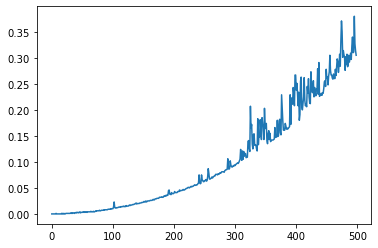

In [19]:
plt.plot(np.arange(0, len(times)), times)